# CMSE 202 Final Project

### &#9989; Steven Kendall, Olivia Qiu, Aniessa Terpstra, Daniel Villalba, Qingyun Xu
### &#9989; Section_003
#### &#9989; 4/5/2022

# ___Modeling populations over time___

## Background and Motivation

_(Provide context for the problem.  **Clearly state the question(s) you set
out to answer.**)_

## Methodology

_(How did you go about answering your question(s)? Most of your code will be
contained in this section.)_

In [148]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd

In [150]:
usa = pd.read_csv("USA_pop.csv",delimiter=",")
usa

,year,population,yearly percent change,yearly change,migrants,fertility rate,density,death rate,growth rate
0,2020,331002651,0.0059,1937734,954806,1.78,36,0.008880,0.0059
1,2019,329064917,0.0060,1968652,954806,1.85,36,0.008782,0.0060
2,2018,327096265,0.0062,2011509,954806,1.85,36,0.008685,0.0062
3,2017,325084756,0.0064,2068761,954806,1.85,36,0.008580,0.0064
4,2016,323015995,0.0067,2137685,954806,1.85,35,0.008475,0.0067
5,2015,320878310,0.0076,2373367,992343,1.88,35,0.008369,0.0069
6,2010,309011475,0.0093,2803593,1085751,2.06,34,0.008138,0.0088
7,2005,294993511,0.0093,2656520,1066979,2.04,32,0.008362,0.0090
8,2000,281710909,0.0122,3309433,1771991,2.00,31,0.008603,0.0114
9,1995,265163745,0.0101,2608687,892751,2.03,29,0.008754,0.0111


<AxesSubplot:xlabel='year', ylabel='population'>

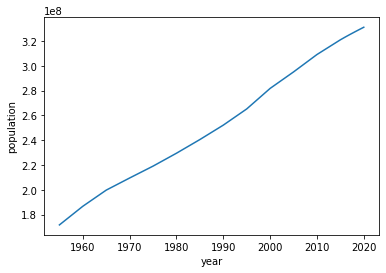

In [153]:
sns.lineplot(x = usa['year'],y = usa['population'])

Here is the actual population of the US over 65 years (1955-2020)

In [158]:
class population():
    def __init__(self,start,growth,migrants):
        self.start = start
        self.growth = growth
        self.migrants = migrants
        
    def update_pop(self,time):
        t = []
        population = []
        for i in range(time):
            pop = self.start + self.start*self.growth - self.migrants
            self.start = pop
            t.append(i)
            population.append(pop)
        return t,population
    
    def plot(self,time):
        t,pop = self.update_pop(time)
        plt.plot(t,pop)

-178523185.41673082

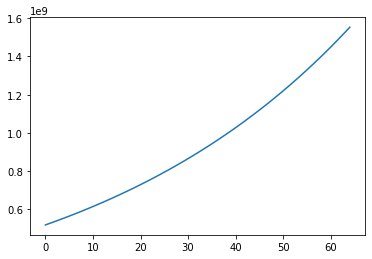

In [159]:
us = population(usa.iloc[17,1],usa.iloc[17,8],usa.iloc[17,4])
us_t,us_pop = us.update_pop(65)
us.plot(65)
usa.iloc[0,1]-us_pop[-1] #actual minus predicted US population for 2020

This model isn't accurate becuase it over estimates the population by a lot. This makes sense because there is no death rate. So I found the death rate of the US overtime and added it into the csv file that I loaded in. Below I am going to have an updated class which includes the death rate. 

In [160]:
class population_update():
    def __init__(self,start,growth,death,migrants):
        self.start = start
        self.growth = growth
        self.death = death
        self.migrants = migrants
        
    def update_pop(self,time):
        t = []
        population = []
        for i in range(time):
            pop = self.start + self.start*self.growth - self.start*self.death - self.migrants
            self.start = pop
            t.append(i)
            population.append(pop)
        return t,population
    
    def plot(self,time):
        t,pop = self.update_pop(time)
        plt.plot(t,pop)

57522526.424859524

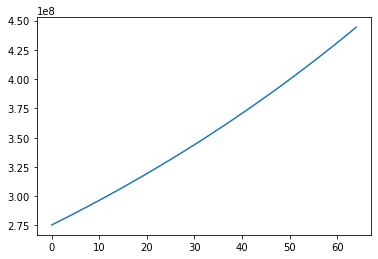

In [162]:
us2 = population_update(usa.iloc[17,1],usa.iloc[17,8],usa.iloc[17,7],usa.iloc[17,4])
us2_t,us2_pop = us2.update_pop(65)
us2.plot(65)
usa.iloc[0,1]-us2_pop[-1] #actual value minus the predicted value

Okay so this model is better because its prediction is closer but now we are under estimating the population. I think this is because we aren't updating the population growth/death over the years.

## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

### References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_